Load libraries and packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import numpy as np
import matplotlib
import itertools
import operator
from sklearn.linear_model import LinearRegression
import math

Load Darksy weather dataset

In [2]:
ds_weather = pd.read_hdf("/home/ottermegazord/PycharmProjects/funstuff/farmx/data/ds_weather.h5")

In [3]:
ds_weather['timestamp'] = ds_weather['timestamp'].astype(float)

Convert posix time to UTC time

In [4]:
# datetime.utcfromtimestamp(ds_weather['timestamp'][0]).strftime('%Y-%m-%dT%H:%M:%SZ')

In [5]:
def posix2utc(timestamp):
    return datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%dT%H:%M:%SZ')

In [6]:
ds_weather['time'] = ds_weather['timestamp'].apply(posix2utc)

In [7]:
ds_weather.head(10)

,timestamp,temperature,humidity,wind_speed,wind_direction,rainfall,time
0,1.462378e+09,29.5,77.0,2.44,234.0,0.0,2016-05-04T16:00:00Z
1,1.462381e+09,28.2,85.0,1.87,306.0,0.0,2016-05-04T17:00:00Z
2,1.462385e+09,27.8,86.0,0.00,NaN,0.0,2016-05-04T18:00:00Z
3,1.462388e+09,27.2,91.0,1.87,324.0,0.0,2016-05-04T19:00:00Z
4,1.462392e+09,27.2,91.0,1.25,0.0,0.0,2016-05-04T20:00:00Z
5,1.462396e+09,27.8,90.0,0.00,NaN,0.0,2016-05-04T21:00:00Z
6,1.462399e+09,27.9,90.0,0.00,NaN,0.0,2016-05-04T22:00:00Z
7,1.462403e+09,27.9,90.0,0.00,NaN,0.0,2016-05-04T23:00:00Z
8,1.462406e+09,28.7,85.0,1.55,22.0,0.0,2016-05-05T00:00:00Z
9,1.462410e+09,30.0,80.0,3.75,271.0,0.0,2016-05-05T01:00:00Z


In [8]:
ds_weather.shape

(21096, 7)

In [9]:
ds_weather.isna().sum()

timestamp            0
temperature          0
humidity             0
wind_speed           0
wind_direction    1158
rainfall          2927
time                 0
dtype: int64

In [10]:
def scale_plot_size(factor=1.5):
    import matplotlib as mpl
    default_dpi = mpl.rcParamsDefault['figure.dpi']
    mpl.rcParams['figure.dpi'] = default_dpi*factor

Isolate year, month ... from times

In [11]:
ds_weather['year'] = pd.DatetimeIndex(ds_weather['time']).year
ds_weather['month'] = pd.DatetimeIndex(ds_weather['time']).month
ds_weather['day'] = pd.DatetimeIndex(ds_weather['time']).day
ds_weather['hour'] = pd.DatetimeIndex(ds_weather['time']).day
ds_weather['minute'] = pd.DatetimeIndex(ds_weather['time']).day


In [12]:
print(ds_weather.head(10))

      timestamp  temperature  humidity  wind_speed  wind_direction  rainfall  \
0  1.462378e+09         29.5      77.0        2.44           234.0       0.0   
1  1.462381e+09         28.2      85.0        1.87           306.0       0.0   
2  1.462385e+09         27.8      86.0        0.00             NaN       0.0   
3  1.462388e+09         27.2      91.0        1.87           324.0       0.0   
4  1.462392e+09         27.2      91.0        1.25             0.0       0.0   
5  1.462396e+09         27.8      90.0        0.00             NaN       0.0   
6  1.462399e+09         27.9      90.0        0.00             NaN       0.0   
7  1.462403e+09         27.9      90.0        0.00             NaN       0.0   
8  1.462406e+09         28.7      85.0        1.55            22.0       0.0   
9  1.462410e+09         30.0      80.0        3.75           271.0       0.0   

                   time  year  month  day  hour  minute  
0  2016-05-04T16:00:00Z  2016      5    4     4       4  
1  

Upsample data to 10 min readings

Change index to DatimeIndex

In [13]:
ds_weather.index = pd.to_datetime(ds_weather.timestamp, unit='s')
ds_weather =(ds_weather[(ds_weather['year'] == 2017)])
ds_weather = (ds_weather[(ds_weather['month'].between(1, 10, inclusive=True))])

In [14]:
upsampledDS = ds_weather.resample('1H').mean().ffill()

# Plot graphs of features

## Plot of temperature against time

Text(0.5,1,'Temperature against time (Darksky)')

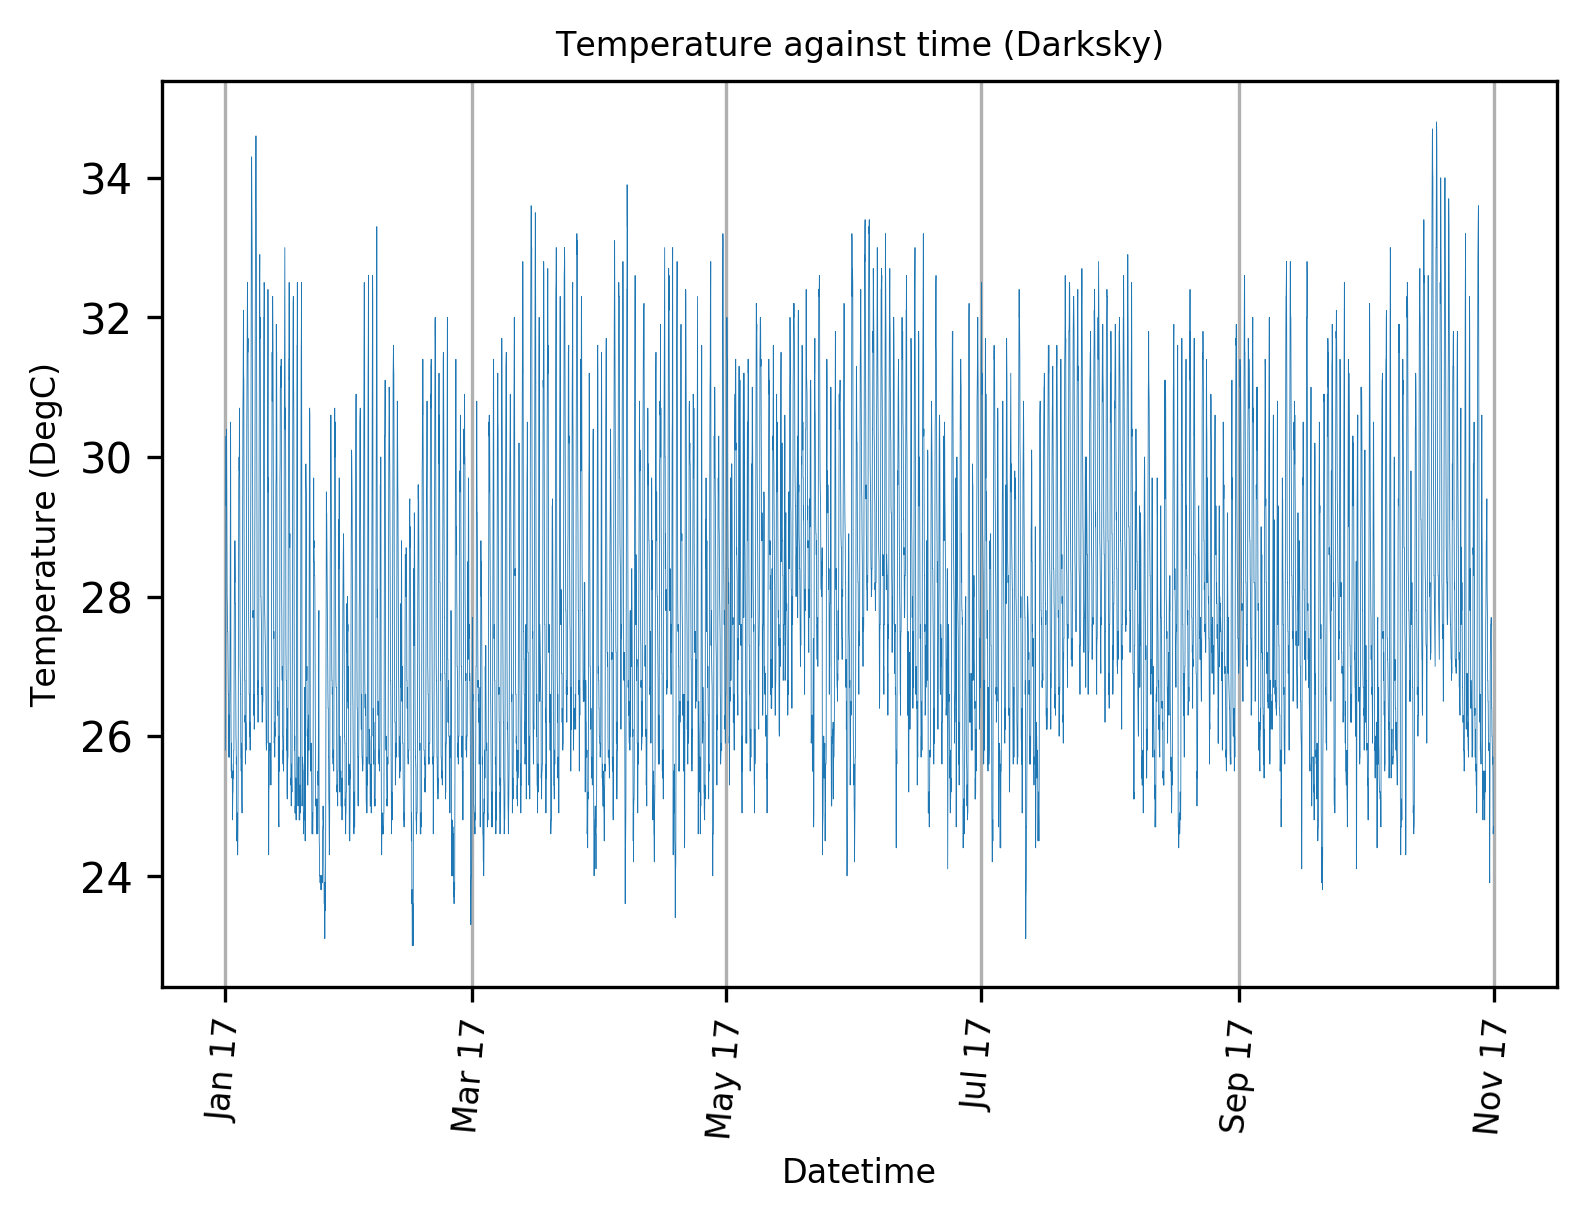

In [15]:
scale_plot_size(3.0)
ax = plt.axes()
plt.plot(upsampledDS.index, upsampledDS['temperature'], linewidth=0.2)
ax.xaxis.grid(True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.setp(ax.get_xticklabels(), rotation=85, fontsize=8)
plt.xlabel('Datetime', fontsize=8)
plt.ylabel('Temperature (DegC)', fontsize=8)
plt.title('Temperature against time (Darksky)', fontsize=8)

In [16]:
upsampledDS.shape

(7296, 11)

## Plot of humidity against time

Text(0.5,1,'Humidity against time (Darksky)')

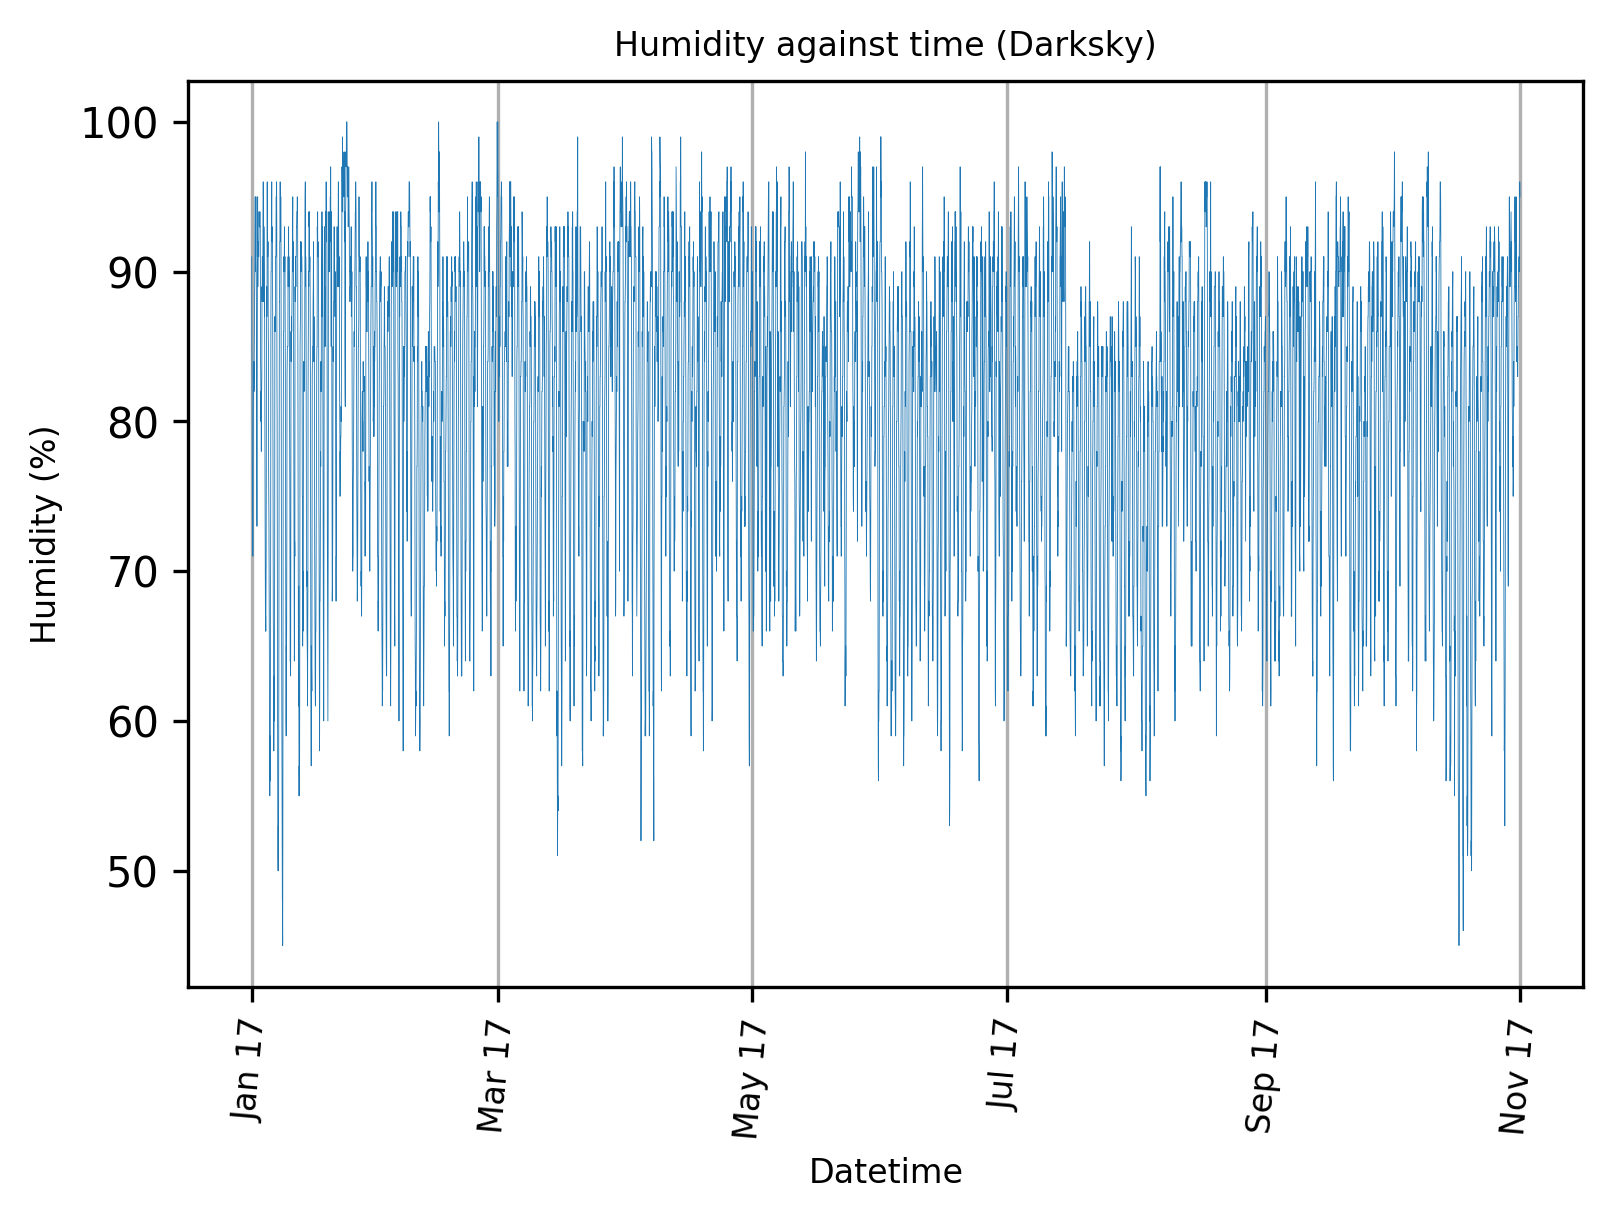

In [17]:
scale_plot_size(3.0)
ax = plt.axes()
plt.plot(upsampledDS.index, upsampledDS['humidity'], linewidth=0.2)
ax.xaxis.grid(True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.setp(ax.get_xticklabels(), rotation=85, fontsize=8)
plt.xlabel('Datetime', fontsize=8)
plt.ylabel('Humidity (%)', fontsize=8)
plt.title('Humidity against time (Darksky)', fontsize=8)

## Plot of Wind Speed against time

Text(0.5,1,'Windspeed against time (Darksky)')

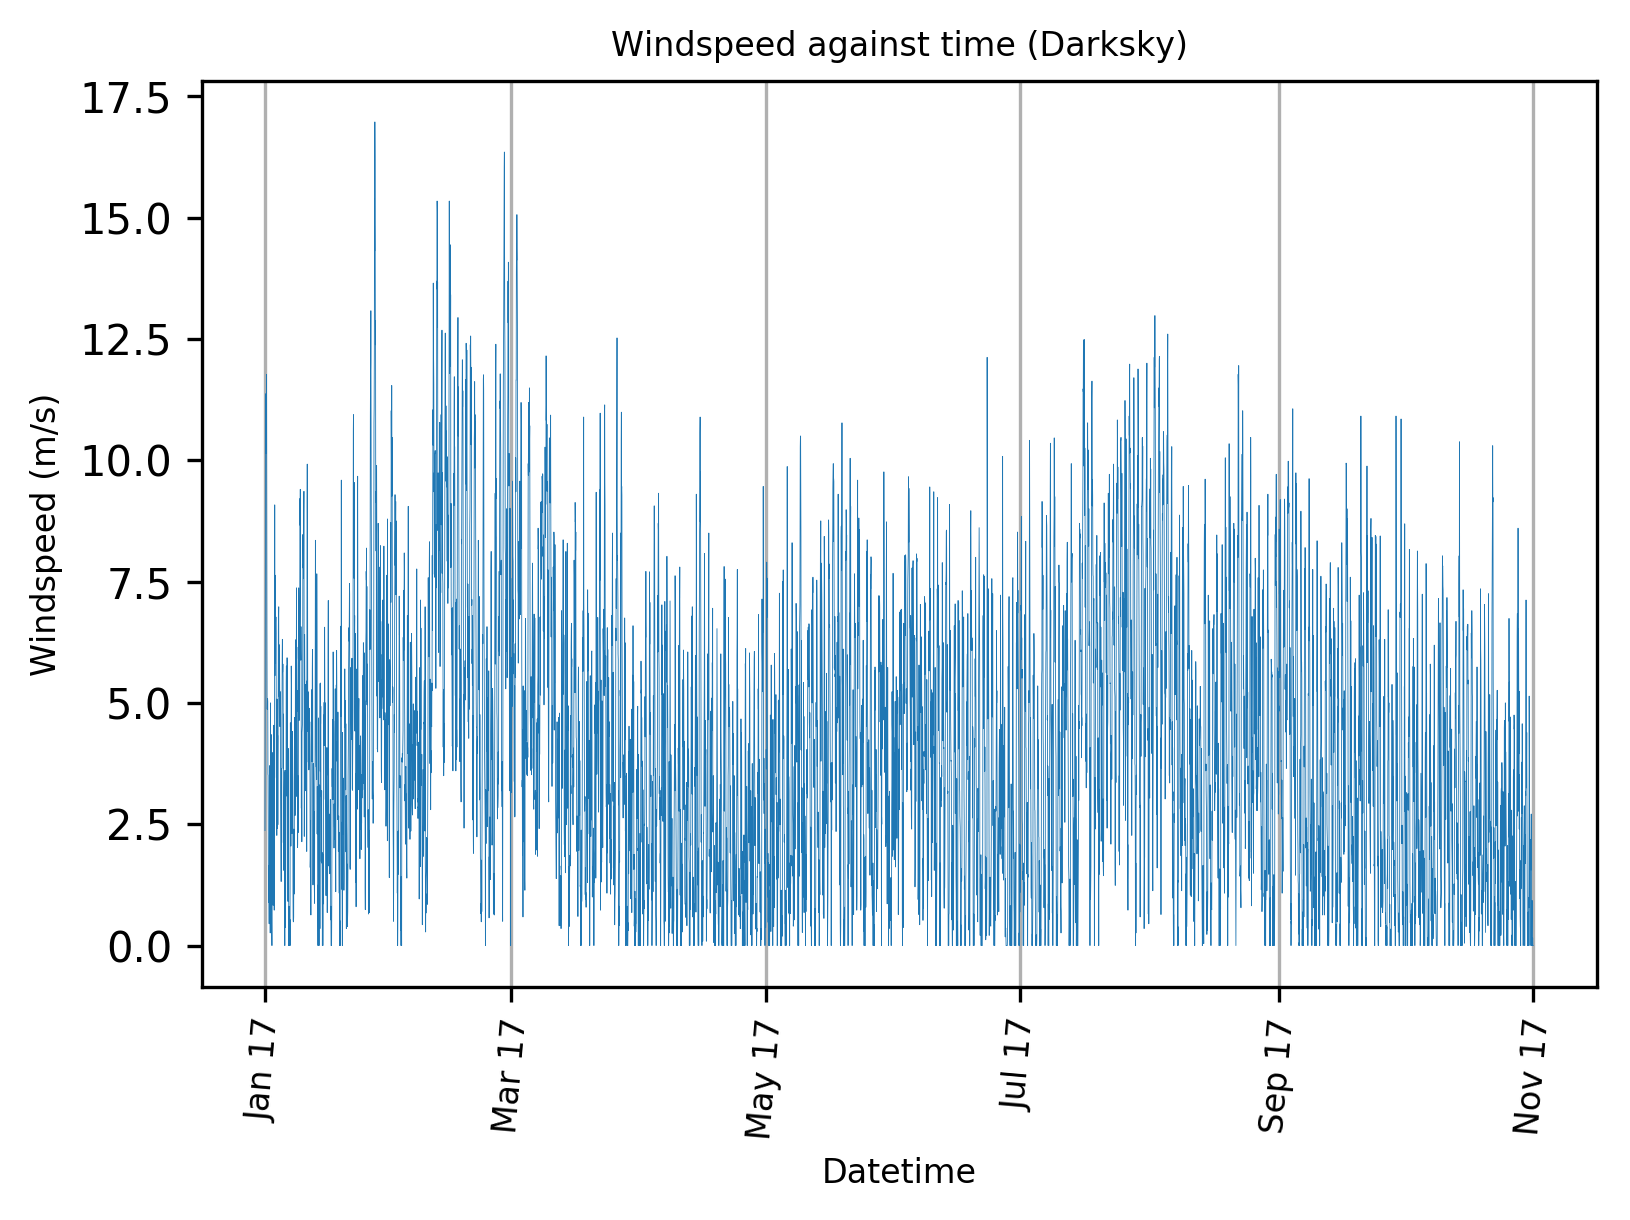

In [18]:
scale_plot_size(3.0)
ax = plt.axes()
plt.plot(upsampledDS.index, upsampledDS['wind_speed'], linewidth=0.2)
ax.xaxis.grid(True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.setp(ax.get_xticklabels(), rotation=85, fontsize=8)
plt.xlabel('Datetime', fontsize=8)
plt.ylabel('Windspeed (m/s)', fontsize=8)
plt.title('Windspeed against time (Darksky)', fontsize=8)

## Plot of Wind Direction against time

Text(0.5,1,'Wind direction against time (Darksky)')

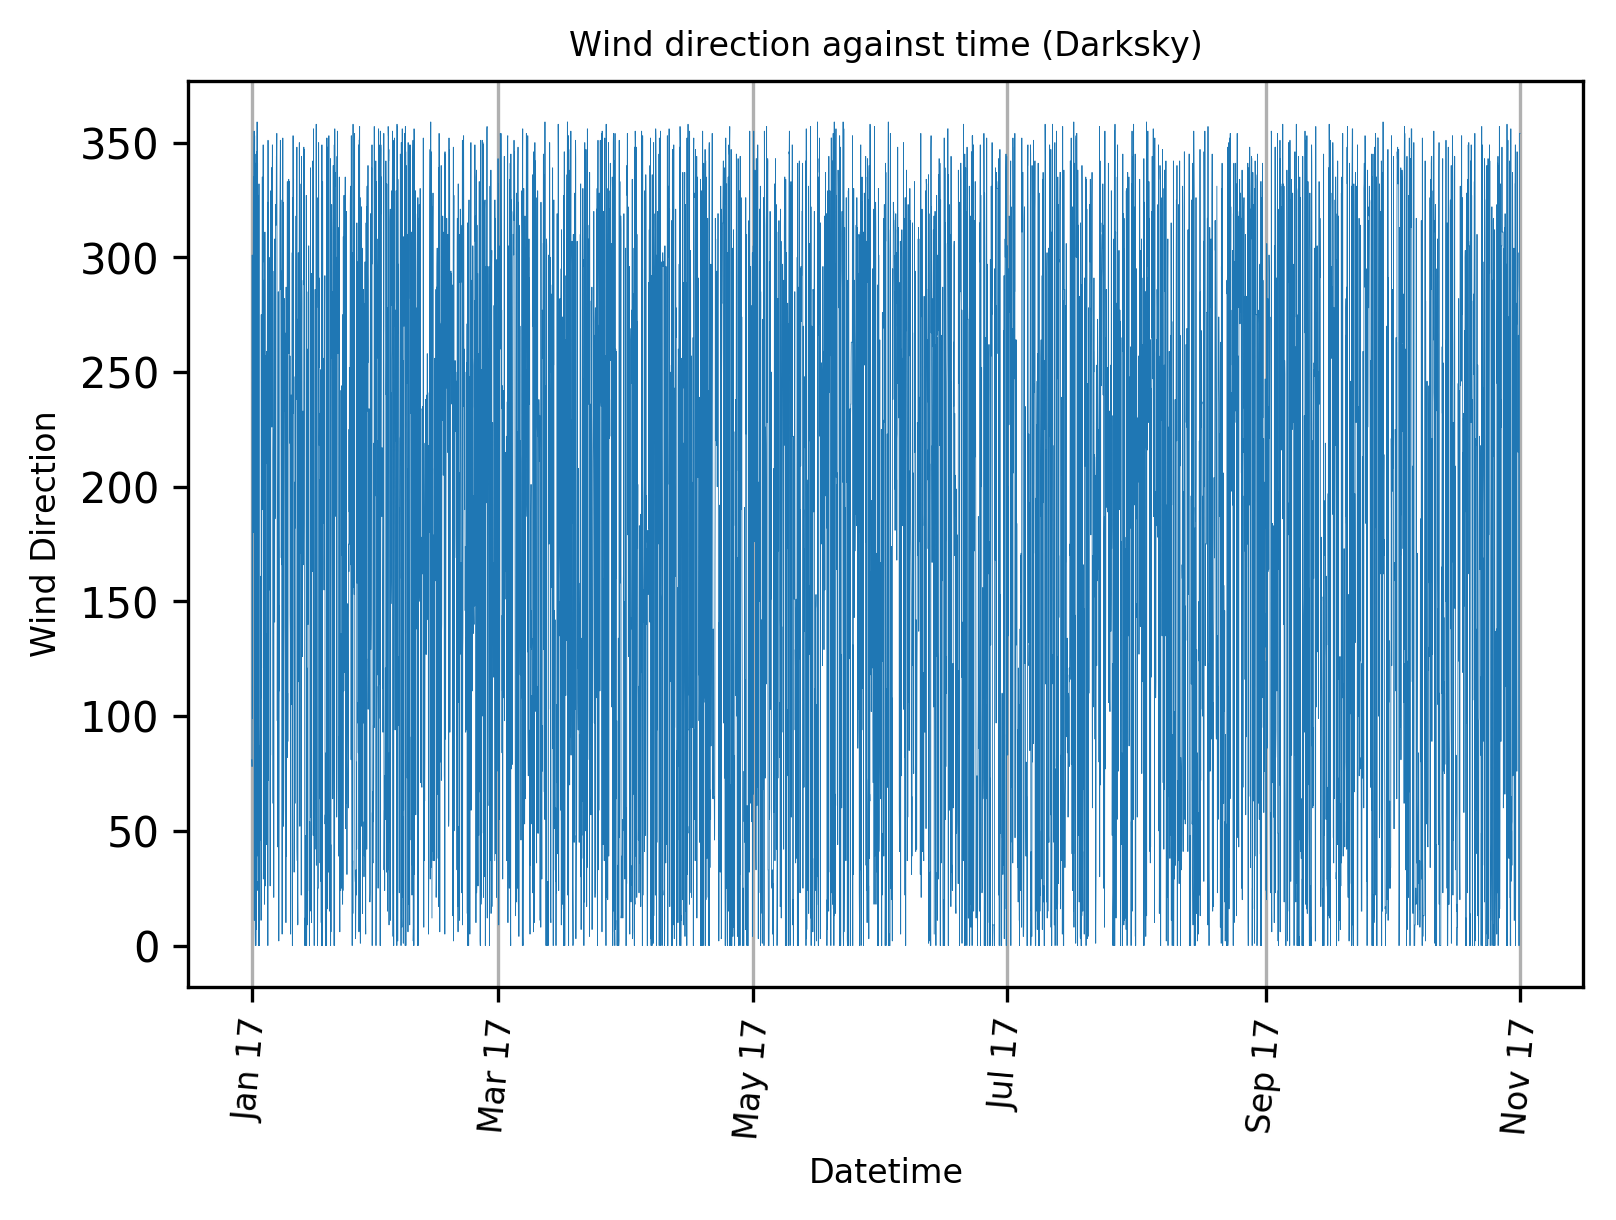

In [19]:
scale_plot_size(3.0)
ax = plt.axes()
plt.plot(upsampledDS.index, upsampledDS['wind_direction'], linewidth=0.2)
ax.xaxis.grid(True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.setp(ax.get_xticklabels(), rotation=85, fontsize=8)
plt.xlabel('Datetime', fontsize=8)
plt.ylabel('Wind Direction', fontsize=8)
plt.title('Wind direction against time (Darksky)', fontsize=8)

## Plot of Rainfall against time

Text(0.5,1,'Rainfall against time (rainfall)')

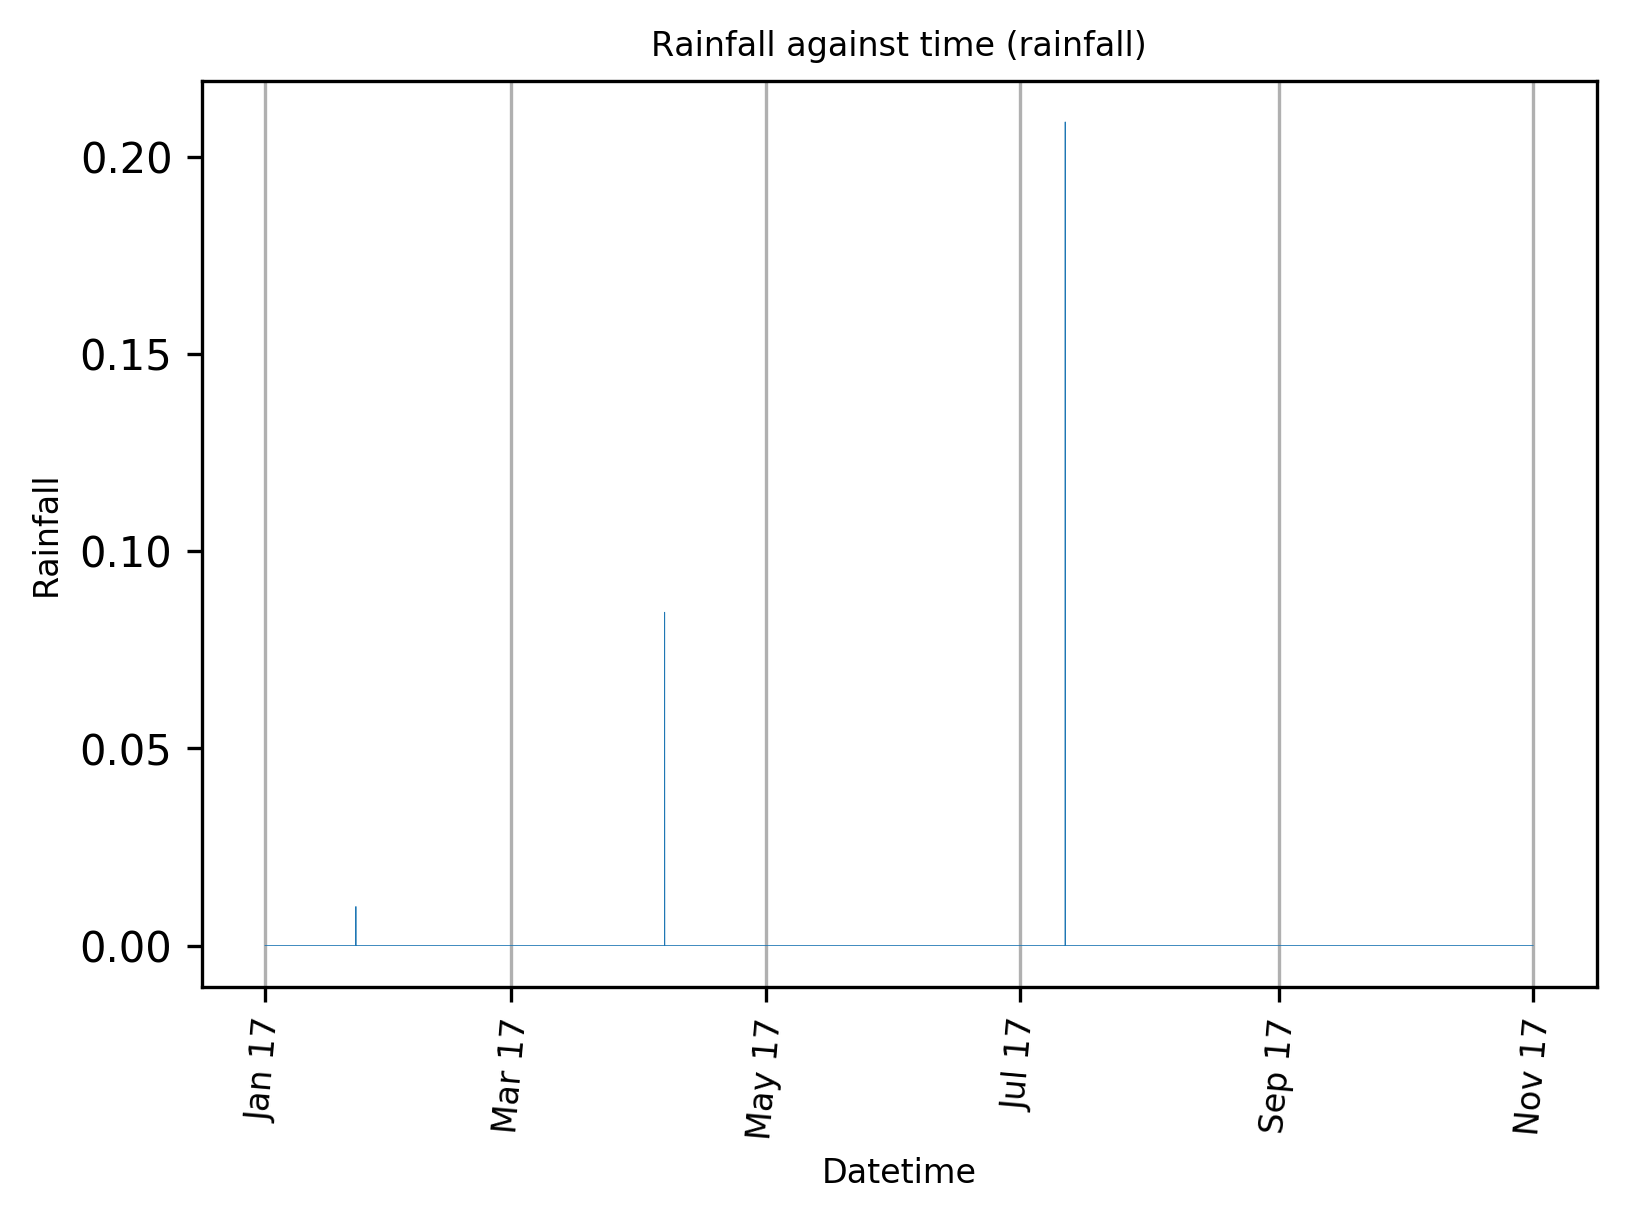

In [20]:
scale_plot_size(3.0)
ax = plt.axes()
plt.plot(upsampledDS.index, upsampledDS['rainfall'], linewidth=0.2)
ax.xaxis.grid(True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.setp(ax.get_xticklabels(), rotation=85, fontsize=8)
plt.xlabel('Datetime', fontsize=8)
plt.ylabel('Rainfall', fontsize=8)
plt.title('Rainfall against time (rainfall)', fontsize=8)

In [21]:
upsampledDS.isna().sum()

timestamp         0
temperature       0
humidity          0
wind_speed        0
wind_direction    0
rainfall          0
year              0
month             0
day               0
hour              0
minute            0
dtype: int64

# Data imputation

## Interpolation 

### Find all combinations of features

In [22]:
features = ['temperature', 'wind_speed', 'rainfall', 'humidity']
combinations = []
for subset in itertools.combinations(features, 2):
    combinations.append(subset)

In [23]:
upsampledDS.head(5)

,timestamp,temperature,humidity,wind_speed,wind_direction,rainfall,year,month,day,hour,minute
timestamp,,,,,,,,,,,
2017-01-01 00:00:00,1.483229e+09,25.8,91.0,2.37,81.0,0.0,2017,1,1,1,1
2017-01-01 01:00:00,1.483232e+09,27.0,85.0,4.48,78.0,0.0,2017,1,1,1,1
2017-01-01 02:00:00,1.483236e+09,28.0,83.0,6.20,301.0,0.0,2017,1,1,1,1
2017-01-01 03:00:00,1.483240e+09,29.6,75.0,9.73,99.0,0.0,2017,1,1,1,1
2017-01-01 04:00:00,1.483243e+09,30.3,72.0,11.37,256.0,0.0,2017,1,1,1,1


In [24]:
upsampledDS.isna().sum()

timestamp         0
temperature       0
humidity          0
wind_speed        0
wind_direction    0
rainfall          0
year              0
month             0
day               0
hour              0
minute            0
dtype: int64

In [25]:
noNanDS = upsampledDS.dropna()

for combination in combinations:
    score = np.corrcoef(noNanDS[combination[0]], noNanDS[combination[1]])[0][1]
    print("Correlation (%s vs %s): %.5f" % (combination[0], combination[1], score))

Correlation (temperature vs wind_speed): 0.52610
Correlation (temperature vs rainfall): -0.02088
Correlation (temperature vs humidity): -0.93625
Correlation (wind_speed vs rainfall): 0.00997
Correlation (wind_speed vs humidity): -0.59570
Correlation (rainfall vs humidity): 0.01585


In [26]:
clf = LinearRegression().fit(np.array(noNanDS['rainfall']).reshape(-1, 1), np.array(noNanDS['humidity']).reshape(-1, 1))

In [27]:
upsampledDS.isna().sum()
# ip_temp_Semb = upsampledSembawang['temperature'].fillna()
# clf.predict(np.array([27.2]).reshape(1,-1))

timestamp         0
temperature       0
humidity          0
wind_speed        0
wind_direction    0
rainfall          0
year              0
month             0
day               0
hour              0
minute            0
dtype: int64

In [28]:
def prediction(feature):
    if math.isnan(feature) == False:
        return clf.predict(np.array([feature]).reshape(1, -1))[0][0]

humidity_interpolate = upsampledDS['rainfall'].apply(prediction)

upsampledDS['humidity'] = upsampledDS['humidity'].fillna(humidity_interpolate)
upsampledDS.isna().sum()

timestamp         0
temperature       0
humidity          0
wind_speed        0
wind_direction    0
rainfall          0
year              0
month             0
day               0
hour              0
minute            0
dtype: int64

Text(0.5,1,'Humidity against time (Sembawang Station)')

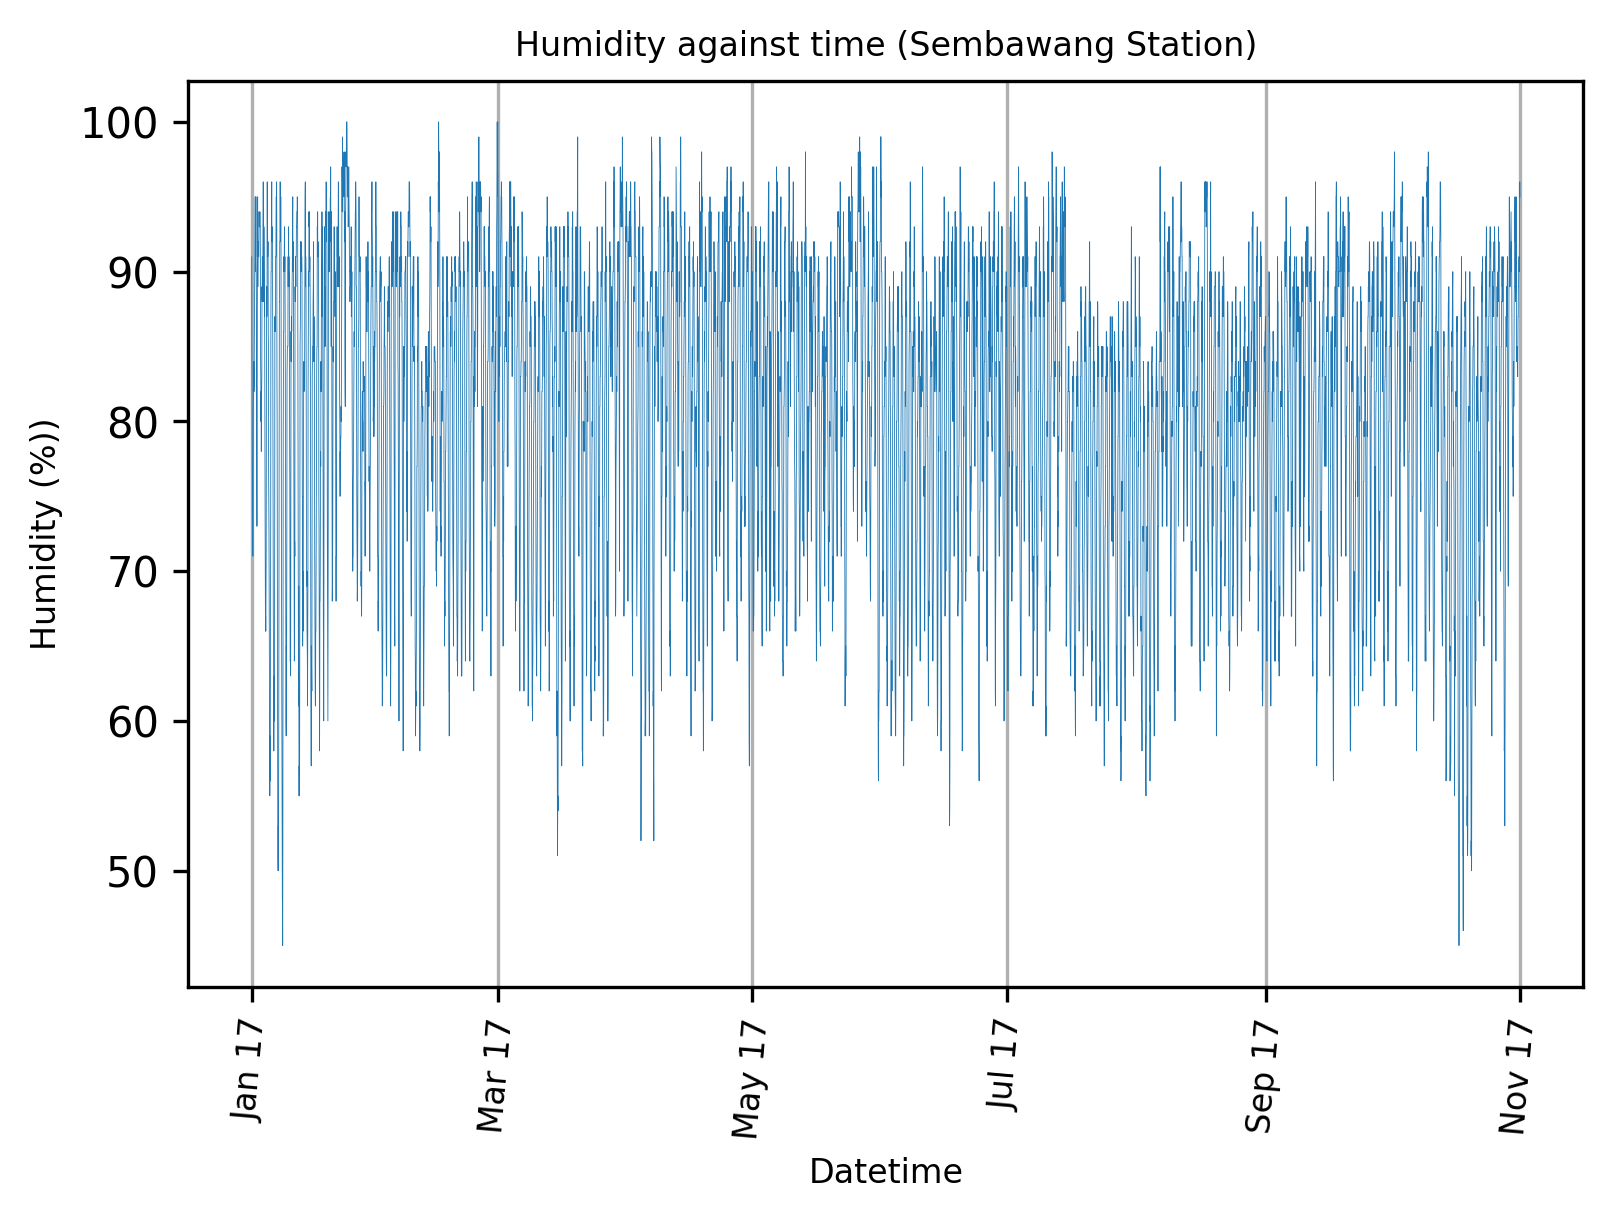

In [32]:
scale_plot_size(3.0)
ax = plt.axes()
plt.plot(upsampledDS.index, upsampledDS['humidity'], linewidth=0.2)
ax.xaxis.grid(True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.setp(ax.get_xticklabels(), rotation=85, fontsize=8)
plt.xlabel('Datetime', fontsize=8)
plt.ylabel('Humidity (%))', fontsize=8)
plt.title('Humidity against time (Sembawang Station)', fontsize=8)

In [30]:
upsampledDS.tail(10)

,timestamp,temperature,humidity,wind_speed,wind_direction,rainfall,year,month,day,hour,minute
timestamp,,,,,,,,,,,
2017-10-31 14:00:00,1.509458e+09,26.0,89.0,0.00,266.0,0.0,2017,10,31,31,31
2017-10-31 15:00:00,1.509462e+09,26.0,89.0,0.21,0.0,0.0,2017,10,31,31,31
2017-10-31 16:00:00,1.509466e+09,25.8,90.0,0.58,0.0,0.0,2017,10,31,31,31
2017-10-31 17:00:00,1.509469e+09,25.7,90.0,0.93,0.0,0.0,2017,10,31,31,31
2017-10-31 18:00:00,1.509473e+09,25.6,91.0,0.00,0.0,0.0,2017,10,31,31,31
2017-10-31 19:00:00,1.509476e+09,25.7,90.0,0.00,0.0,0.0,2017,10,31,31,31
2017-10-31 20:00:00,1.509480e+09,25.4,92.0,0.16,354.0,0.0,2017,10,31,31,31
2017-10-31 21:00:00,1.509484e+09,24.6,95.0,0.00,354.0,0.0,2017,10,31,31,31
2017-10-31 22:00:00,1.509487e+09,24.7,96.0,0.00,354.0,0.0,2017,10,31,31,31


In [31]:
upsampledDS.to_hdf('data/2017_DS.h5', key = 'upsampledDS')